<a href="https://colab.research.google.com/github/Kritika0027/Data-Analytics/blob/main/YOLO_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os
import cv2
import numpy as np
import requests

In [22]:
urls = {
    "yolov3.weights": "https://pjreddie.com/media/files/yolov3.weights",
    "yolov3.cfg": "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg",
    "coco.names": "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"
}

In [23]:
for filename, url in urls.items():
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"{filename} already exists.")

Downloaded yolov3.weights
Downloaded yolov3.cfg
Downloaded coco.names


In [24]:
config_path = 'yolov3.cfg'
weights_path = 'yolov3.weights'
coco_names_path = 'coco.names'


In [25]:
with open(coco_names_path, 'r') as f:
    class_names = f.read().strip().split('\n')


In [26]:
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [29]:
image_path = 'path/to/your/image.jpg'

In [30]:
image = cv2.imread(image_path)

In [32]:
from google.colab import files
uploaded = files.upload()  # This will allow you to upload the image from your local machine


Saving coco.png to coco.png


In [42]:
for filename, url in urls.items():
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"{filename} already exists.")

yolov3.weights already exists.
yolov3.cfg already exists.
coco.names already exists.


In [43]:
config_path = 'yolov3.cfg'
weights_path = 'yolov3.weights'
coco_names_path = 'coco.names'

In [44]:
with open(coco_names_path, 'r') as f:
    class_names = f.read().strip().split('\n')

In [45]:
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [46]:
image_path = list(uploaded.keys())[0]

In [47]:
image = cv2.imread(image_path)

In [48]:
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}. Please check the path.")

height, width = image.shape[:2]

In [49]:
blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
net.setInput(blob)

In [50]:
output_layers = net.getUnconnectedOutLayersNames()
layer_outputs = net.forward(output_layers)

In [51]:
conf_threshold = 0.5  # Confidence threshold
nms_threshold = 0.4   # Non-max suppression threshold
boxes, confidences, class_ids = [], [], []

In [52]:
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]


In [53]:
if confidence > conf_threshold:
            box = detection[0:4] * np.array([width, height, width, height])
            (center_x, center_y, box_width, box_height) = box.astype("int")

            x = int(center_x - (box_width / 2))
            y = int(center_y - (box_height / 2))

            boxes.append([x, y, int(box_width), int(box_height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [54]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

In [56]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

In [57]:
if len(indices) > 0:
    # Flatten the indices array correctly
    indices = indices.flatten()


In [58]:
for i in indices:
        x, y, w, h = boxes[i]
        color = [int(c) for c in np.random.randint(0, 255, size=3)]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = f"{class_names[class_ids[i]]}: {confidences[i]:.2f}"
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [60]:
from google.colab.patches import cv2_imshow

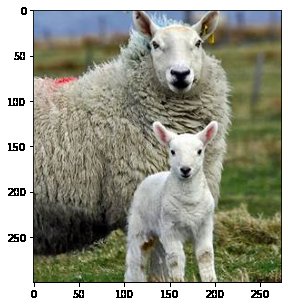

In [61]:
cv2_imshow(image)
cv2.waitKey(0)  # This is not strictly necessary in Colab, so you can remove it
cv2.destroyAllWindows()